In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("all.csv")

/Users/cherylliu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,8,44,45,94,95,104,107,109,125,126,127,128,143,144,155,191,193,194) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [92]:
df.head()

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AAACCTGAGAACTCGG-1_contig_2,GGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAACATGAAACACC...,H,F,T,F,T,F,T,IGHV4-34*01,...,411.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
1,AAACCTGAGATATGGT-1_contig_2,AGCTCTGGGAGAGGAGCTCCAGCCTTGGGATTCCCAGCTGTCTCCA...,H,F,T,F,T,F,T,IGHV3-73*02,...,404.0,GCTGC,5.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
2,AAACCTGAGATGTCGG-1_contig_2,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,388.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'S', '2 ': 'S', '3 ': 'E', '4 ...",|||||
3,AAACCTGAGCACCGTC-1_contig_2,ACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAGC...,H,F,T,F,T,F,T,IGHV1-18*01,...,398.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
4,AAACCTGAGCGTAATA-1_contig_2,AGCTCTGGGAGAGGAGCCCCAGCCGTGAGATTCCCAGGAGTTTCCA...,H,F,T,F,T,F,T,IGHV3-49*04,...,385.0,NaN,0.0,NaN,NaN,GTCAGCCCAACGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'L', '3 ': 'V', '4 ...",|||||


In [93]:
df.columns

Index(['sequence_id_heavy', 'sequence_heavy', 'locus_heavy',
       'stop_codon_heavy', 'vj_in_frame_heavy', 'v_frameshift_heavy',
       'productive_heavy', 'rev_comp_heavy', 'complete_vdj_heavy',
       'v_call_heavy',
       ...
       'cdr3_end_light', 'np1_light', 'np1_length_light', 'np2_light',
       'np2_length_light', 'c_region_light', 'Isotype_light',
       'Redundancy_light', 'ANARCI_numbering_light', 'ANARCI_status_light'],
      dtype='object', length=198)

In [94]:
df.shape

(1572406, 198)

In [95]:
#random 
small_df1 = df.sample(n = 30, replace = False)

In [96]:
small_df1.describe()

,v_alignment_start_heavy,v_alignment_end_heavy,d_alignment_start_heavy,d_alignment_end_heavy,j_alignment_start_heavy,j_alignment_end_heavy,junction_length_heavy,junction_aa_length_heavy,v_score_heavy,d_score_heavy,...,cdr2_end_light,fwr3_start_light,fwr3_end_light,fwr4_start_light,fwr4_end_light,cdr3_start_light,cdr3_end_light,np1_length_light,np2_length_light,Redundancy_light
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,...,30.000000,30.000000,30.000000,27.000000,27.000000,30.000000,30.000000,30.000000,0.0,27.0
mean,1.0,288.100000,296.933333,310.200000,319.433333,366.866667,57.700000,19.233333,431.09600,25.810433,...,258.833333,259.833333,367.033333,397.296296,426.259259,368.033333,396.633333,1.900000,NaN,1.0
std,0.0,36.044369,37.173344,37.055783,37.096039,38.676138,14.837395,4.945798,63.36452,13.281837,...,7.353551,7.353551,7.439333,8.934870,8.873437,7.439333,8.747348,2.496204,NaN,0.0
min,1.0,98.000000,104.000000,125.000000,133.000000,176.000000,33.000000,11.000000,142.06600,10.301000,...,244.000000,245.000000,352.000000,380.000000,409.000000,353.000000,379.000000,0.000000,NaN,1.0
25%,1.0,292.000000,297.000000,308.250000,315.000000,361.000000,45.000000,15.000000,422.52600,14.626750,...,253.000000,254.000000,361.000000,392.500000,421.500000,362.000000,391.250000,0.000000,NaN,1.0
50%,1.0,294.000000,301.500000,313.500000,324.000000,372.500000,58.500000,19.500000,455.24700,22.798500,...,260.500000,261.500000,369.000000,397.000000,426.000000,370.000000,396.000000,1.000000,NaN,1.0
75%,1.0,296.000000,306.500000,323.000000,333.000000,382.000000,69.000000,23.000000,459.53150,32.892250,...,263.000000,264.000000,371.750000,401.000000,430.000000,372.750000,403.000000,3.000000,NaN,1.0
max,1.0,302.000000,327.000000,351.000000,357.000000,411.000000,96.000000,32.000000,472.38600,52.600000,...,270.000000,271.000000,378.000000,418.000000,447.000000,379.000000,417.000000,9.000000,NaN,1.0


In [97]:
small_df_2 = df.sample(n = 30, replace = False)
small_df_2.describe()

,v_alignment_start_heavy,v_alignment_end_heavy,d_alignment_start_heavy,d_alignment_end_heavy,j_alignment_start_heavy,j_alignment_end_heavy,junction_length_heavy,junction_aa_length_heavy,v_score_heavy,d_score_heavy,...,cdr2_end_light,fwr3_start_light,fwr3_end_light,fwr4_start_light,fwr4_end_light,cdr3_start_light,cdr3_end_light,np1_length_light,np2_length_light,Redundancy_light
count,30.0,30.000000,29.000000,29.000000,30.000000,30.000000,30.00000,30.000000,30.000000,29.000000,...,30.000000,30.000000,30.000000,28.000000,28.000000,30.000000,30.000000,30.000000,0.0,28.0
mean,1.0,295.766667,304.793103,318.413793,328.533333,375.833333,59.20000,19.733333,448.339033,27.605069,...,260.533333,261.533333,368.533333,397.571429,426.535714,369.533333,397.633333,1.666667,NaN,1.0
std,0.0,3.430928,6.183961,9.759674,11.214933,13.429467,13.01564,4.338547,30.264551,12.235978,...,11.675891,11.675891,11.675891,10.286376,10.297364,11.675891,11.992766,2.022858,NaN,0.0
min,1.0,287.000000,294.000000,301.000000,309.000000,351.000000,36.00000,12.000000,355.528000,10.301000,...,249.000000,250.000000,357.000000,385.000000,414.000000,358.000000,384.000000,0.000000,NaN,1.0
25%,1.0,293.250000,301.000000,311.000000,322.000000,367.750000,51.75000,17.250000,458.363000,17.992000,...,253.000000,254.000000,361.000000,389.000000,418.000000,362.000000,388.000000,0.000000,NaN,1.0
50%,1.0,296.000000,305.000000,318.000000,331.000000,376.000000,60.00000,20.000000,461.479000,25.682000,...,260.000000,261.000000,368.000000,395.500000,424.500000,369.000000,394.500000,1.000000,NaN,1.0
75%,1.0,297.750000,309.000000,327.000000,333.750000,382.000000,65.25000,21.750000,463.037000,33.373000,...,264.500000,265.500000,372.500000,403.250000,432.250000,373.500000,402.750000,2.000000,NaN,1.0
max,1.0,304.000000,316.000000,333.000000,359.000000,414.000000,96.00000,32.000000,470.828000,52.600000,...,298.000000,299.000000,406.000000,428.000000,457.000000,407.000000,433.000000,8.000000,NaN,1.0


In [98]:
small_df_3 = df.sample(n = 30, replace = False)
small_df_3.describe()

,v_alignment_start_heavy,v_alignment_end_heavy,d_alignment_start_heavy,d_alignment_end_heavy,j_alignment_start_heavy,j_alignment_end_heavy,junction_length_heavy,junction_aa_length_heavy,v_score_heavy,d_score_heavy,...,cdr2_end_light,fwr3_start_light,fwr3_end_light,fwr4_start_light,fwr4_end_light,cdr3_start_light,cdr3_end_light,np1_length_light,np2_length_light,Redundancy_light
count,30.0,30.000000,28.000000,28.000000,30.000000,30.000000,30.000000,30.000000,30.000000,28.000000,...,30.000000,30.000000,30.000000,27.000000,27.000000,30.000000,30.000000,30.000000,0.0,27.0
mean,1.0,294.266667,302.250000,315.821429,322.200000,368.533333,52.900000,17.633333,442.781767,27.467607,...,267.333333,268.333333,375.533333,402.407407,431.296296,376.533333,404.633333,1.000000,NaN,1.0
std,0.0,1.946408,6.022335,10.212750,10.965149,10.988186,11.071398,3.690466,24.390012,13.873834,...,25.129092,25.129092,25.436511,19.909911,19.976553,25.436511,25.134786,1.231764,NaN,0.0
min,1.0,290.000000,294.000000,301.000000,306.000000,349.000000,36.000000,12.000000,374.225000,10.301000,...,247.000000,248.000000,355.000000,382.000000,411.000000,356.000000,381.000000,0.000000,NaN,1.0
25%,1.0,293.000000,297.000000,308.000000,314.250000,363.000000,48.000000,16.000000,428.369500,14.146000,...,253.000000,254.000000,361.000000,393.500000,422.500000,362.000000,392.250000,0.000000,NaN,1.0
50%,1.0,294.500000,300.500000,315.000000,321.000000,367.000000,51.000000,17.000000,455.247000,23.760000,...,261.000000,262.000000,369.000000,399.000000,428.000000,370.000000,398.000000,0.000000,NaN,1.0
75%,1.0,296.000000,305.000000,323.250000,330.000000,370.000000,54.000000,18.000000,461.089500,37.698750,...,264.000000,265.000000,372.000000,402.000000,431.000000,373.000000,402.500000,2.000000,NaN,1.0
max,1.0,298.000000,317.000000,339.000000,347.000000,397.000000,81.000000,27.000000,466.153000,52.600000,...,349.000000,350.000000,457.000000,480.000000,509.000000,458.000000,484.000000,3.000000,NaN,1.0


In [99]:
small_df1.to_csv('sampled_df.csv', index = False)

In [100]:
#small_df = pd.read_csv("datasets/1279050_1_Paired_All.csv.gz", compression="gzip", sep=",", skiprows=1)

In [101]:
small_df1.head()

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
1018594,AGCAGCCTCCTGCAGG-1_contig_2,ATCATCCAACAGCCACATCCCTTCTCTACAGAAGCCTCTGAGAGGA...,H,F,T,F,T,F,T,IGHV1-46*01,...,404.0,GAA,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1174456,ACCCACTTCAGTCCCT-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-30*02,...,381.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
922636,ACGAGGAGTAGAAGGA-1_contig_1,ACATGGGAAGTGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAAC...,H,F,T,F,T,F,T,IGHV4-34*01,...,400.0,GA,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1237253,ACACCGGCATGGTAGG-1_contig_1,AGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCAC...,H,F,T,F,T,F,T,IGHV3-48*03,...,395.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'A', '4 ...",|||||
315537,GATCGATTCAAAGTAG-1_contig_1,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,379.0,C,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||


In [102]:
small_df1.to_csv("sampled_df.csv", index = False)

In [103]:
small_df1.shape

(30, 198)

**label encoding test**

In [104]:
small_df['sequence_alignment_aa_heavy']

1537568    QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...
1390188    QVQLQESGPGLVKPSETLSLTCAVSGYSISSGYYWGWIRQPPGKGL...
413004     QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...
260850     EVQLVESGGGLVKPGGSLRLSCAASGFTFSSYSMNWVRQAPGKGLE...
981594     QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYAMHWVRQAPGKGLE...
1033245    QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...
681338     EVQLLESGGGLVQPGGSLRLSCAASGFTFDSYAMSWVRQAPGKGLE...
93184      QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...
389007     QVQLVQSGAEVRKPGSSVRVSCRTSGGSFSNYAFSWVRQAPGQGLE...
693917     QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...
1540492    QMQLVQSGPEVKKPGTSVKVSCKASGFTFTSSAVQWVRQARGQRLE...
811098     QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMSWIRQAPGKGLE...
823982     EVQLVESGGGLVKPGGSLRLSCAASGFTFSNAWMSWVRQAPGKGLE...
1247774    EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...
615213     EVQLVQSGAEVKKPGESLKISCKGSGYSFTSYWIGWVRQMPGKGLE...
1342598    QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYYMHWVRQAPGQGLE...
1462992    EVQLLESGGGLVQ

In [105]:
le = LabelEncoder()
le.fit(small_df["sequence_alignment_aa_heavy"])

LabelEncoder()

In [106]:
integer_encoded_letters_array = le.transform(small_df["sequence_alignment_aa_heavy"])

In [107]:
#integer_encoded_letters_array

In [108]:
len(integer_encoded_letters_array)

30

In [109]:
#1d to 2d

# integer_encoded_letters_array = integer_encoded_letters_array.reshape(len(integer_encoded_letters_array), 1)
# integer_encoded_letters_array

In [110]:
#convert to original sequences
original_letters = le.inverse_transform(integer_encoded_letters_array)

In [111]:
#change array to series
integer_encoded_letters_series = pd.Series(integer_encoded_letters_array)
integer_encoded_letters_series
#add to small_df
small_df['integer_encoded_letters'] = integer_encoded_letters_series

**one hot encode test**

In [112]:
#use get dummies()
df_dummies = pd.get_dummies(small_df, prefix = ['integer_encoded_letters'], columns = ['integer_encoded_letters'], drop_first = True)
df_dummies

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
1537568,AACTCAGAGTTGTAGA-1_contig_1,ATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGGAGCA...,H,F,T,F,T,F,T,IGHV1-69*01,...,389.0,GGGG,4.0,NaN,NaN,GTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'S', '2 ': 'Y', '3 ': 'E', '4 ...",|||||
1390188,TGCCAAACAATCACAC-1_contig_1,TTTGGGGGCTTTCTGAGAGTCATGGACCTCCTGTGCAAGAACATGA...,H,F,T,F,T,F,T,IGHV4-38-2*02,...,394.0,AA,2.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'S', '2 ': 'Y', '3 ': 'V', '4 ...",|||||
413004,AGTCTTTCATTGGGCC-1_contig_1,ACATGGGAAATACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAAC...,H,F,T,F,T,F,T,IGHV4-59*01,...,399.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
260850,CATCCACAGTGAAGTT-1_contig_1,GAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGTG...,H,F,T,F,T,F,T,IGHV3-21*01,...,396.0,TT,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
981594,GACGGCTTCTTCTGGC-1_contig_2,CGAGCCCAGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCAGC...,H,F,T,F,T,F,T,IGHV3-30*04,...,399.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1033245,TTAGGACCACGGATAG-1_contig_1,ACACATTTCCTTAAATTCAGGTTCCAGCTCACATGGGAAATACTTT...,H,F,T,F,T,F,T,IGHV4-59*01,...,388.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
681338,CACTCCAGTGCAACGA-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,H,F,T,F,T,F,T,IGHV3-23*01,...,399.0,GG,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'V', '4 ...",|||||
93184,CCTTCCCCACAGCGTC-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-33*01,...,393.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
389007,TCTGAGAGTGACTCAT-1_contig_2,ATCCCATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGGAGCA...,H,F,T,F,T,F,T,IGHV1-69*01,...,395.0,TGTATTC,7.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'2 ': 'I', '3 ': 'V', '4 ': 'M', '5 ...",||||Shorter than IMGT defined: fw1|
693917,AATCGGTCAGGTCCAC-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-30*18,...,383.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||


***Functions***

In [116]:
#can motify it when know which columns to use later
def one_hot_encode_seq(df, column):
    #Output a df with a specific columns that want to get dummies in
    
    #label_encode
    le = LabelEncoder()
    le.fit(df[column])
    integer_encoded_letters_arry = le.transform(df[column])
    
    #append
    integer_encoded_letters_series = pd.Series(integer_encoded_letters_arry)
    df['integer_encoded_letters'] = integer_encoded_letters_series
    
    #one hot encode
    df_dummies = pd.get_dummies(df, prefix = ['integer_encoded_letters'], columns = ['integer_encoded_letters'], drop_first = True)
    return df_dummies

In [117]:
encode_df = one_hot_encode_seq(small_df1, 'sequence_alignment_aa_heavy')
encode_df

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
1018594,AGCAGCCTCCTGCAGG-1_contig_2,ATCATCCAACAGCCACATCCCTTCTCTACAGAAGCCTCTGAGAGGA...,H,F,T,F,T,F,T,IGHV1-46*01,...,404.0,GAA,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1174456,ACCCACTTCAGTCCCT-1_contig_1,GAGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCA...,H,F,T,F,T,F,T,IGHV3-30*02,...,381.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
922636,ACGAGGAGTAGAAGGA-1_contig_1,ACATGGGAAGTGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAAC...,H,F,T,F,T,F,T,IGHV4-34*01,...,400.0,GA,2.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1237253,ACACCGGCATGGTAGG-1_contig_1,AGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCAC...,H,F,T,F,T,F,T,IGHV3-48*03,...,395.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'A', '4 ...",|||||
315537,GATCGATTCAAAGTAG-1_contig_1,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,379.0,C,1.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
330498,CGGAGTCTCGCCGTGA-1_contig_1,ATTCTTTTTTCTTTTCTGGGGATGCTTTCTGAGAGTCATGGATCTC...,H,F,T,F,T,F,T,IGHV4-39*01,...,411.0,C,1.0,NaN,NaN,CGGTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
641930,GAGGTGATCAACACCA-1_contig_2,GGGATCACACAACAGCCACATCCCTCCCCTACAGAAGCCCCCAGAG...,H,F,T,F,T,F,T,IGHV1-24*01,...,391.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||
1229877,CACAAACTCAATAAGG-1_contig_1,TGGGGCTTTCTGAGAGTCATGGACCTCCTGTGCAAGAACATGAAGC...,H,F,T,F,T,F,T,IGHV4-38-2*01,...,392.0,GAC,3.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
1439549,GATCGCGTCAGAGGTG-1_contig_2,AGCATCACGTAACAACCAGATTCCTCCTCTAAAGAAGCCCCTGGGA...,H,F,T,F,T,F,F,IGHV1-69*09,...,404.0,A,1.0,NaN,NaN,GTCAGCCCAAGGCCAACCCCACTGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
176100,GCTTGAACACAGGAGT-1_contig_1,GGGGACTTTCTGAGACTCATGGACCTCCTGCACAAGAACATGAAAC...,H,F,T,F,T,F,T,IGHV4-4*07,...,395.0,GGGGCCTA,8.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'D', '2 ': 'I', '3 ': 'Q', '4 ...",|||||


In [118]:
alph = np.array(sorted('ACDEFGHIKLMNPQRSTVWY'))
residue_info = pd.read_csv("residue_dict_copy.csv", header = 0, index_col = 0)
def physchemvh_gen(df, column):
    res_counts = pd.DataFrame(index = alph)
    df = df.set_index(column)
    for i in df.index:
        characters = pd.Series(list(i))
        res_counts = pd.concat([res_counts, characters.value_counts()], axis = 1, ignore_index = False)
    res_counts.fillna(0, inplace = True)
    res_counts = res_counts.T
    hydrophobicity = []    
    for column in res_counts:
        hydros = []
        for index, row in res_counts.iterrows():
            hydros.append(row[column]*residue_info.loc[column, 'Hydropathy Score'])
        hydrophobicity.append(hydros)
    hydrophobicity = pd.DataFrame(hydrophobicity).T
    hydrophobicity['ave'] = hydrophobicity.sum(axis = 1)/115
    res_counts['Hydro'] = res_counts['A'] +  res_counts['I'] +  res_counts['L']+  res_counts['F']+  res_counts['V']
    res_counts['Amph'] = res_counts['W'] +  res_counts['Y']+  res_counts['M']
    res_counts['Polar'] = res_counts['Q'] +  res_counts['N'] + res_counts['S'] +  res_counts['T'] +  res_counts['C']+  res_counts['M']
    res_counts['Charged'] =  res_counts['R'] +  res_counts['K'] + res_counts['D'] +  res_counts['E'] +  res_counts['H']
    res_counts.reset_index(drop = True, inplace = True)
    physchemvh = pd.concat([res_counts, hydrophobicity['ave']], axis = 1, ignore_index = False)
    return physchemvh

In [119]:
# small_df_temp = small_df.set_index('sequence_alignment_aa_heavy')
# small_df_temp

In [120]:
physchemvh_gen(small_df1, 'sequence_alignment_aa_heavy')

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
0,7.0,2.0,4.0,4.0,4.0,14.0,3.0,3.0,5.0,8.0,...,15.0,13.0,10.0,4.0,8.0,32.0,15.0,42.0,22.0,-0.353913
1,8.0,4.0,6.0,4.0,4.0,17.0,1.0,3.0,6.0,9.0,...,15.0,8.0,11.0,5.0,12.0,35.0,20.0,39.0,25.0,-0.389565
2,7.0,2.0,3.0,3.0,3.0,12.0,3.0,4.0,5.0,10.0,...,19.0,9.0,8.0,5.0,10.0,32.0,15.0,41.0,18.0,-0.386087
3,8.0,2.0,5.0,5.0,3.0,13.0,0.0,3.0,4.0,10.0,...,17.0,6.0,9.0,3.0,9.0,33.0,14.0,36.0,19.0,-0.225217
4,7.0,2.0,7.0,3.0,4.0,12.0,1.0,2.0,5.0,6.0,...,12.0,12.0,10.0,4.0,9.0,29.0,16.0,40.0,23.0,-0.541739
5,7.0,2.0,2.0,6.0,4.0,11.0,0.0,4.0,2.0,12.0,...,23.0,11.0,6.0,6.0,5.0,33.0,13.0,48.0,18.0,-0.311304
6,8.0,2.0,6.0,8.0,2.0,13.0,1.0,1.0,6.0,7.0,...,11.0,14.0,12.0,3.0,10.0,30.0,18.0,40.0,25.0,-0.433913
7,6.0,2.0,3.0,3.0,2.0,11.0,1.0,5.0,5.0,10.0,...,20.0,12.0,10.0,4.0,9.0,33.0,13.0,42.0,14.0,-0.091304
8,9.0,4.0,4.0,5.0,3.0,11.0,2.0,4.0,6.0,5.0,...,19.0,9.0,13.0,3.0,7.0,34.0,13.0,46.0,25.0,-0.445217
9,6.0,2.0,4.0,3.0,2.0,14.0,2.0,5.0,5.0,9.0,...,19.0,11.0,10.0,5.0,7.0,32.0,15.0,45.0,20.0,-0.305217


In [121]:
from sklearn.cluster import KMeans

In [122]:
X = physchemvh_gen(small_df1, 'sequence_alignment_aa_heavy')

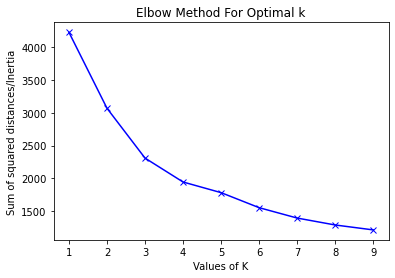

In [123]:
#Elbow Method
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

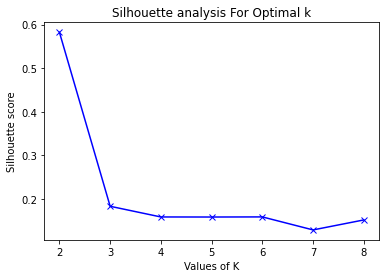

In [124]:
#Silhouette

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
     # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [125]:
# optimal cluster 2

In [126]:
kmeans = KMeans(n_clusters=2).fit(X)
cluster_labels = kmeans.labels_

In [127]:
X['cluster'] = kmeans.labels_

In [128]:
X

,A,C,D,E,F,G,H,I,K,L,...,T,V,W,Y,Hydro,Amph,Polar,Charged,ave,cluster
0,7.0,2.0,4.0,4.0,4.0,14.0,3.0,3.0,5.0,8.0,...,13.0,10.0,4.0,8.0,32.0,15.0,42.0,22.0,-0.353913,0
1,8.0,4.0,6.0,4.0,4.0,17.0,1.0,3.0,6.0,9.0,...,8.0,11.0,5.0,12.0,35.0,20.0,39.0,25.0,-0.389565,0
2,7.0,2.0,3.0,3.0,3.0,12.0,3.0,4.0,5.0,10.0,...,9.0,8.0,5.0,10.0,32.0,15.0,41.0,18.0,-0.386087,0
3,8.0,2.0,5.0,5.0,3.0,13.0,0.0,3.0,4.0,10.0,...,6.0,9.0,3.0,9.0,33.0,14.0,36.0,19.0,-0.225217,0
4,7.0,2.0,7.0,3.0,4.0,12.0,1.0,2.0,5.0,6.0,...,12.0,10.0,4.0,9.0,29.0,16.0,40.0,23.0,-0.541739,0
5,7.0,2.0,2.0,6.0,4.0,11.0,0.0,4.0,2.0,12.0,...,11.0,6.0,6.0,5.0,33.0,13.0,48.0,18.0,-0.311304,0
6,8.0,2.0,6.0,8.0,2.0,13.0,1.0,1.0,6.0,7.0,...,14.0,12.0,3.0,10.0,30.0,18.0,40.0,25.0,-0.433913,0
7,6.0,2.0,3.0,3.0,2.0,11.0,1.0,5.0,5.0,10.0,...,12.0,10.0,4.0,9.0,33.0,13.0,42.0,14.0,-0.091304,0
8,9.0,4.0,4.0,5.0,3.0,11.0,2.0,4.0,6.0,5.0,...,9.0,13.0,3.0,7.0,34.0,13.0,46.0,25.0,-0.445217,0
9,6.0,2.0,4.0,3.0,2.0,14.0,2.0,5.0,5.0,9.0,...,11.0,10.0,5.0,7.0,32.0,15.0,45.0,20.0,-0.305217,0


In [129]:
X_cluster = X.groupby('cluster').mean()
X_cluster

,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Hydro,Amph,Polar,Charged,ave
cluster,,,,,,,,,,,,,,,,,,,,,
0,7.310345,2.206897,4.827586,4.068966,3.206897,12.965517,0.965517,3.931034,5.103448,8.551724,...,16.758621,10.103448,10.241379,4.0,8.655172,33.241379,14.931034,40.896552,20.206897,-0.289805
1,2.000000,3.000000,6.000000,1.000000,2.000000,3.000000,0.000000,1.000000,1.000000,4.000000,...,9.000000,7.000000,3.000000,1.0,5.000000,12.000000,7.000000,26.000000,11.000000,-0.284348


In [132]:
import seaborn as sns

<AxesSubplot:>

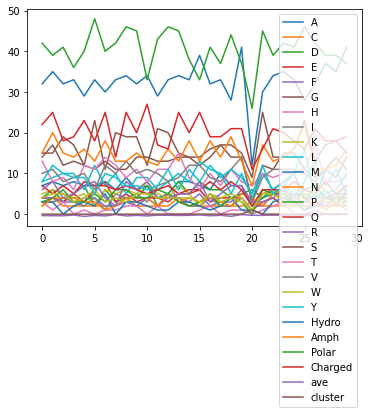

In [133]:
X.plot()